In [1]:
import os
import torch
import json

os.environ["MKL_NUM_THREADS"]="1"
os.environ["NUMEXPR_NUM_THREADS"]="1"
os.environ["OMP_NUM_THREADS"]="1"

import sys

import pytorch_lightning as pl
from omegaconf import DictConfig, OmegaConf
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from spatial.merfish_dataset import FilteredMerfishDataset, MerfishDataset
from spatial.models.monet_ae import MonetAutoencoder2D, TrivialAutoencoder
from spatial.train import train
from spatial.predict import test

In [2]:
rad_to_neighbors = {}

for radius in range(100):
    data = MerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]/2/graph.x.shape[0]
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]/2/graph.x.shape[0]
    rad_to_neighbors[radius] /= len(data)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157/157 [02:14<00:00,  1.17it/s]


In [5]:
with open("rad_to_neighbors.json", "w") as rad2neighbors_results:
    json.dump(rad_to_neighbors, rad2neighbors_results)

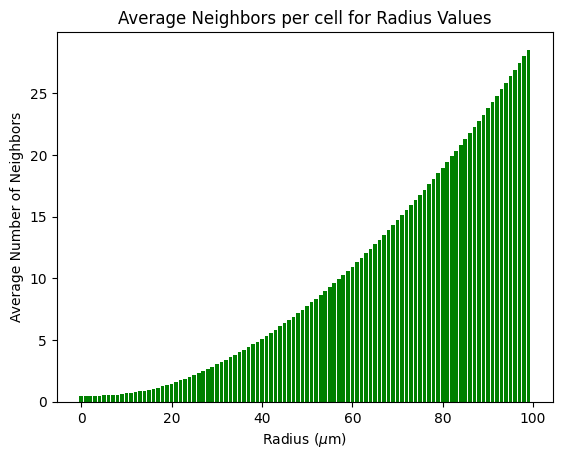

In [7]:
import matplotlib.pyplot as plt

plt.bar(list(rad_to_neighbors.keys()), rad_to_neighbors.values(), color='g')
plt.title("Average Neighbors per cell for Radius Values")
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Average Number of Neighbors")
plt.savefig("rad_to_neighbors.png")
plt.show()

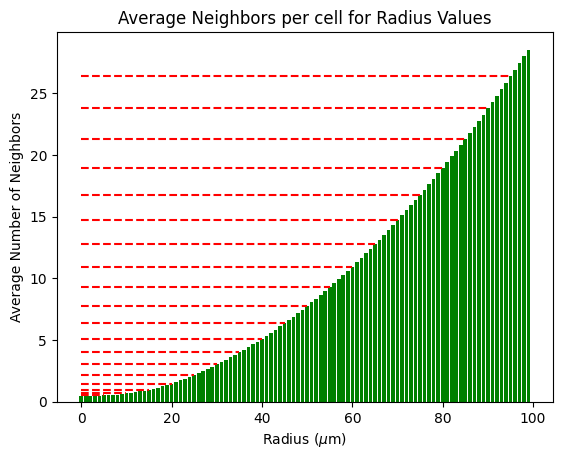

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rad_to_neighbors is defined and is a dictionary
plt.bar(list(rad_to_neighbors.keys()), rad_to_neighbors.values(), color='g')

# Defining x-values at intervals of 5 up to a maximum of 60 or the largest key in rad_to_neighbors
max_x = max(rad_to_neighbors.keys())
x_values = range(5, max_x + 1, 5)

# Drawing horizontal dashed lines and annotating them
for x in x_values:
    if x in rad_to_neighbors:
        y = rad_to_neighbors[x]
        plt.hlines(y, xmin=0, xmax=x, color='r', linestyle='dashed')

        # Positioning the text above the line if there's enough space, otherwise to the left
        # if y + 3 <= plt.ylim()[1]:  # Check if there's space above
        #     plt.text(-38, y - 6 * np.exp(-y), f"f({x}) = {round(y, 2)}", fontsize=8, color='blue', verticalalignment='top')
        # else:
        #     plt.text(x - 5, y, f"f({x}) = {y}", fontsize=8, color='blue', horizontalalignment='left')

plt.title("Average Neighbors per cell for Radius Values")
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Average Number of Neighbors")
plt.savefig("rad_to_neighbors.png", dpi=600)
plt.show()

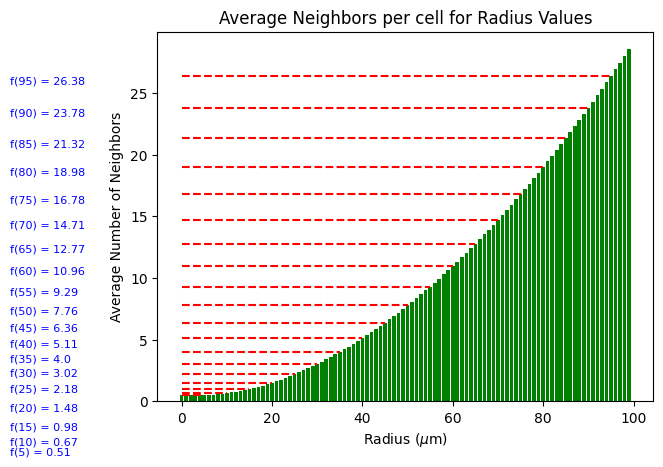

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming rad_to_neighbors is defined and is a dictionary
plt.bar(list(rad_to_neighbors.keys()), rad_to_neighbors.values(), color='g')

# ax = plt.gca()
# ax.set(xlim=(-50,100))

# Defining x-values at intervals of 5 up to a maximum of 60 or the largest key in rad_to_neighbors
max_x = max(rad_to_neighbors.keys())
x_values = range(5, max_x + 1, 5)

# Drawing horizontal dashed lines and annotating them
for x in x_values:
    if x in rad_to_neighbors:
        y = rad_to_neighbors[x]
        plt.hlines(y, xmin=0, xmax=x, color='r', linestyle='dashed')

        # Positioning the text above the line if there's enough space, otherwise to the left
        if y + 3 <= plt.ylim()[1]:  # Check if there's space above
            plt.text(-38, y - 7 * np.exp(-y), f"f({x}) = {round(y, 2)}", fontsize=8, color='blue', verticalalignment='top')
        else:
            plt.text(x - 5, y, f"f({x}) = {y}", fontsize=8, color='blue', horizontalalignment='left')

plt.title("Average Neighbors per cell for Radius Values")
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Average Number of Neighbors")
plt.savefig("rad_to_neighbors_w_annotations.png", pad_inches = 2)
plt.show()


In [ ]:
rad_to_neighbors = {}

for radius in range(100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

In [2]:
rad_to_neighbors = {}

for radius in range(95,100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

../data/raw/merfish_messi.hdf5
95 145594.6923076923 5399
../data/raw/merfish_messi.hdf5
96 148601.52662721893 5399
../data/raw/merfish_messi.hdf5
97 151629.68047337278 5399
../data/raw/merfish_messi.hdf5
98 154692.99408284025 5399
../data/raw/merfish_messi.hdf5
99 157778.9822485207 5399
